# Example 6.2: Randon Walk

In [6]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

# 0 is the left terminal state
# 6 is the right terminal state
# 1 ... 5 represents A ... E
states = np.zeros(7)
#initialization according to textbook
states[1:6] = 0.5
# For convenience, we assume all rewards are 0
# and the left terminal state has value 0, the right terminal state has value 1
# This trick has been used in Gambler's Problem
states[6] = 1

# set up true state values
trueValue = np.zeros(7)
trueValue[1:6] = np.arange(1, 6) / 6.0
trueValue[6] = 1
# for clarity's sakes, lets keep left and right actions as 0s and 1s
LEFT = 0
RIGHT = 1

In [7]:
# Evaluator functions
# states: current states value, will be updated if @batch is False
# alpha: step size
# batch: whether to update @states
def temporalDifference(states, alpha=0.1, batch=False):
    #start in the middle state, as specified in the problem
    state = 3
    #construct list detailing the past history of the agent
    trajectory = [state]
    #list of attained awards
    rewards = [0]
    while True:
        #advance state by one
        oldState = state
        #sample from a binomial distribution. if it is greater than 1/2, move left
        if np.random.binomial(1, 0.5) == LEFT:
            state -= 1
        # otherwise move right
        else:
            state += 1
        # Assume all rewards are 0
        reward = 0
        # add new state to the trajectory
        trajectory.append(state)
        # TD update
        states[oldState] += alpha * (reward + states[state] - states[oldState])
        # terminate
        if state == 6 or state == 0:
            break
        rewards.append(reward)
    return trajectory, rewards

# states: current states value, will be updated if @batch is False
# alpha: step size
# batch: whether to update @states
def monteCarlo(states, alpha=0.1, batch=False):
    state = 3
    trajectory = [3]
    # if end up with left terminal state, all returns are 0
    # if end up with right terminal state, all returns are 1
    returns = 0
    while True:
        if np.random.binomial(1, 0.5) == LEFT:
            state -= 1
        else:
            state += 1
        trajectory.append(state)
        if state == 6:
            returns = 1.0
            break
        elif state == 0:
            returns = 0.0
            break
        for state_ in trajectory[:-1]:
            states[state_] += alpha * (returns - states[state_])
    rewards=[returns] * (len(trajectory) - 1)
    return trajectory, rewards

In [8]:
# Grapher functions
# Figure 6.2 left
def stateValueGraph():
    episodes = [0, 1, 10, 100]
    currentStates = np.copy(states)
    plt.figure(1)
    axisX = np.arange(0, 7)
    for i in range(0, 100 + 1):
        if i in episodes:
            labels=str(i) + ' episodes'
            plt.plot(axisX, currentStates, label=labels)
        temporalDifference(currentStates)
    plt.plot(axisX, trueValue, label='true values')
    plt.xlabel('state')
    plt.legend()

# Figure 6.2 right
def RMSError():
    TDAlpha = [0.15, 0.1, 0.05]
    MCAlpha = [0.01, 0.02, 0.03, 0.04]
    episodes = 100 + 1
    runs = 100
    plt.figure(2)
    axisX = np.arange(0, episodes)
    for alpha in TDAlpha:
        totalTDError=np.zeros(episodes)
        for run in range(0,runs):
            TDerrors=[]
            currentTDStates=np.copy(states)
            for i in range(0,episodes):
                TDerrors.append(np.sqrt(np.sum(np.power(trueValue - currentTDStates, 2)) / 5.0))
                temporalDifference(currentTDStates, alpha=alpha)
            totalTDError +=np.asarray(TDerrors)
        totalTDError /= runs
        plt.plot(axisX, totalTDError, label='MC, alpha='+str(alpha))
    for alpha in MCAlpha:
        totalMCError=np.zeros(episodes)
        for run in range(0,runs):
            MCerrors=[]
            currentMCStates=np.copy(states)
            for i in range(0,episodes):
                MCerrors.append(np.sqrt(np.sum(np.power(trueValue - currentMCStates, 2)) / 5.0))
                monteCarlo(currentMCStates, alpha=alpha)
            totalMCError +=np.asarray(MCerrors)
        totalMCError /= runs
        plt.plot(axisX, totalMCError, label='TD, alpha='+str(alpha))
      
    plt.xlabel('episodes')
    plt.legend()

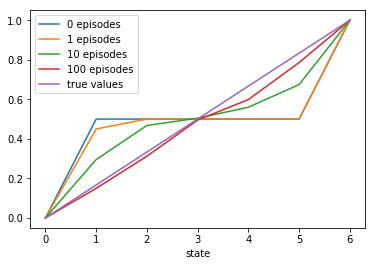

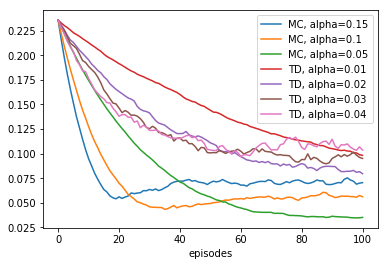

In [9]:
stateValueGraph()
RMSError()
plt.show()